<a href="https://colab.research.google.com/github/llaygh/T5_camp_Amany/blob/main/Amany_Task_1_Artificial_Neural_Networks_(ANN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exam on Artificial Neural Networks (ANN)

Welcome the Artificial Neural Networks (ANN) practical exam. In this exam, you will work on a classification task to predict the outcome of incidents involving buses. You are provided with a dataset that records breakdowns and delays in bus operations. Your task is to build, train, and evaluate an ANN model.

---

## Dataset Overview

### **Dataset:**
* Just run the command under the `Load Data` section to get the data downloaded and unzipped or you can access it [here](https://drive.google.com/file/d/1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-/view?usp=sharing)

### **Dataset Name:** Bus Breakdown and Delays

### **Description:**  
The dataset contains records of incidents involving buses that were either running late or experienced a breakdown. Your task is to predict whether the bus was delayed or had a breakdown based on the features provided.

### **Features:**
The dataset contains the following columns:

- `School_Year`
- `Busbreakdown_ID`
- `Run_Type`
- `Bus_No`
- `Route_Number`
- `Reason`
- `Schools_Serviced`
- `Occurred_On`
- `Created_On`
- `Boro`
- `Bus_Company_Name`
- `How_Long_Delayed`
- `Number_Of_Students_On_The_Bus`
- `Has_Contractor_Notified_Schools`
- `Has_Contractor_Notified_Parents`
- `Have_You_Alerted_OPT`
- `Informed_On`
- `Incident_Number`
- `Last_Updated_On`
- `Breakdown_or_Running_Late` (Target Column)
- `School_Age_or_PreK`

## Load Data

In [30]:
#https://drive.google.com/file/d/1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-/view?usp=sharing
!pip install gdown
!gdown --id 1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Failed to retrieve file url:

	Too many users have viewed or downloaded this file recently. Please
	try accessing the file again later. If the file you are trying to
	access is particularly large or is shared with many people, it may
	take up to 24 hours to be able to view or download the file. If you
	still can't access a file after 24 hours, contact your domain
	administrator.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?id=1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-

but Gdown can't. Please check connections and permissions.


## Importing Libraries

In [11]:
import pandas as pd

## Exploratory Data Analysis (EDA)
This could include:
* **Inspect the dataset**

* **Dataset structure**

* **Summary statistics**

* **Check for missing values**

* **Distribution of features**

* **Categorical feature analysis**

* **Correlation matrix**

* **Outlier detection**

And add more as needed!

In [12]:
df = pd.read_csv('Bus_Breakdown_and_Delays.csv')

df.head()

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
0,2015-2016,1224901,Pre-K/EI,811,1,Other,C353,10/26/2015 08:30:00 AM,10/26/2015 08:40:00 AM,Bronx,...,10MINUTES,5,Yes,Yes,No,10/26/2015 08:40:00 AM,NaN,10/26/2015 08:40:39 AM,Running Late,Pre-K
1,2015-2016,1225098,Pre-K/EI,9302,1,Heavy Traffic,C814,10/27/2015 07:10:00 AM,10/27/2015 07:11:00 AM,Bronx,...,25 MINUTES,3,Yes,Yes,No,10/27/2015 07:11:00 AM,NaN,10/27/2015 07:11:22 AM,Running Late,Pre-K
2,2015-2016,1215800,Pre-K/EI,358,2,Heavy Traffic,C195,09/18/2015 07:36:00 AM,09/18/2015 07:38:00 AM,Bronx,...,15 MINUTES,12,Yes,Yes,Yes,09/18/2015 07:38:00 AM,NaN,09/18/2015 07:38:44 AM,Running Late,Pre-K
3,2015-2016,1215511,Pre-K/EI,331,2,Other,C178,09/17/2015 08:08:00 AM,09/17/2015 08:12:00 AM,Bronx,...,10 minutes,11,Yes,Yes,Yes,09/17/2015 08:12:00 AM,NaN,09/17/2015 08:12:08 AM,Running Late,Pre-K
4,2015-2016,1215828,Pre-K/EI,332,2,Other,S176,09/18/2015 07:39:00 AM,09/18/2015 07:45:00 AM,Bronx,...,10MINUTES,12,Yes,Yes,No,09/18/2015 07:45:00 AM,NaN,09/18/2015 07:56:40 AM,Running Late,Pre-K


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147972 entries, 0 to 147971
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   School_Year                      147972 non-null  object
 1   Busbreakdown_ID                  147972 non-null  int64 
 2   Run_Type                         147883 non-null  object
 3   Bus_No                           147972 non-null  object
 4   Route_Number                     147884 non-null  object
 5   Reason                           147870 non-null  object
 6   Schools_Serviced                 147972 non-null  object
 7   Occurred_On                      147972 non-null  object
 8   Created_On                       147972 non-null  object
 9   Boro                             141654 non-null  object
 10  Bus_Company_Name                 147972 non-null  object
 11  How_Long_Delayed                 126342 non-null  object
 12  Number_Of_Studen

In [34]:
df.isnull().sum()

,0
School_Year,0
Busbreakdown_ID,0
Run_Type,89
Bus_No,0
Route_Number,88
Reason,102
Schools_Serviced,0
Occurred_On,0
Created_On,0
Boro,6318


In [35]:
df.shape

(147972, 21)

In [4]:
df['Breakdown_or_Running_Late'].value_counts()

,count
Breakdown_or_Running_Late,
Running Late,130857
Breakdown,17115


In [36]:
df['Run_Type'].value_counts()

,count
Run_Type,
Special Ed AM Run,85990
Pre-K/EI,20951
Special Ed PM Run,17672
General Ed AM Run,17182
General Ed PM Run,4541
Special Ed Field Trip,628
General Ed Field Trip,570
Project Read PM Run,300
Project Read AM Run,47


In [37]:
df['Reason'].value_counts()

,count
Reason,
Heavy Traffic,87426
Other,21666
Mechanical Problem,13908
Won`t Start,7277
Flat Tire,4585
Weather Conditions,4527
Late return from Field Trip,3464
Problem Run,2204
Delayed by School,1446


In [38]:
df['Boro'].value_counts()

,count
Boro,
Bronx,40995
Brooklyn,35632
Manhattan,28675
Queens,21169
Staten Island,6923
Westchester,4535
Nassau County,1970
New Jersey,887
Rockland County,491


In [39]:
df['How_Long_Delayed'].value_counts()

,count
How_Long_Delayed,
20 MINS,5662
30 MINS,4542
30 minutes,3650
15 mins,3522
30MINS,3199
...,...
45 MON,1
18 mins,1
146,1


In [40]:
df.columns.to_list()

['School_Year',
 'Busbreakdown_ID',
 'Run_Type',
 'Bus_No',
 'Route_Number',
 'Reason',
 'Schools_Serviced',
 'Occurred_On',
 'Created_On',
 'Boro',
 'Bus_Company_Name',
 'How_Long_Delayed',
 'Number_Of_Students_On_The_Bus',
 'Has_Contractor_Notified_Schools',
 'Has_Contractor_Notified_Parents',
 'Have_You_Alerted_OPT',
 'Informed_On',
 'Incident_Number',
 'Last_Updated_On',
 'Breakdown_or_Running_Late',
 'School_Age_or_PreK']

## Data Preprocessing
This could include:

* **Handle Missing Values**
    * Impute missing values or drop them.

* **Encode Categorical Variables**
    * One-hot encoding
    * Label encoding

* **Scale and Normalize Data**
    * Standardization (Z-score)
    * Min-Max scaling

* **Feature Engineering**
    * Create new features
    * Feature selection

* **Handle Imbalanced Data**
    * Oversampling
    * Undersampling

* **Handle Outliers**
    * Remove outliers
    * Transform outliers

* **Remove Duplicates**
    * Remove redundant or duplicate data


And add more as needed!

Please treat these as suggestions. Feel free to use your judgment for the rest.

In [41]:
# Drop 'Busbreakdown_ID' -> unique values useless in prediction
# Drop 'Incident_Number' -> it is empty so it useless too

df = df.drop(['Busbreakdown_ID','Incident_Number'],axis=1)

In [42]:
# drop the nulls in 'Run_Type', 'Route_Number' ,'Reason' because it is a littile
df = df.dropna(subset=['Run_Type', 'Route_Number','Reason' ])

In [43]:
# fill with mode to 'Boro' and 'How_Long_Delayed'
#df['C'] = df['C'].fillna(df['C'].mode()[0])
df['Boro'] = df['Boro'].fillna(df['Boro'].mode()[0])
df['How_Long_Delayed']=df['How_Long_Delayed'].fillna(df['How_Long_Delayed'].mode()[0])

In [44]:
df.isnull().sum()

,0
School_Year,0
Run_Type,0
Bus_No,0
Route_Number,0
Reason,0
Schools_Serviced,0
Occurred_On,0
Created_On,0
Boro,0
Bus_Company_Name,0


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 147693 entries, 0 to 147971
Data columns (total 19 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   School_Year                      147693 non-null  object
 1   Run_Type                         147693 non-null  object
 2   Bus_No                           147693 non-null  object
 3   Route_Number                     147693 non-null  object
 4   Reason                           147693 non-null  object
 5   Schools_Serviced                 147693 non-null  object
 6   Occurred_On                      147693 non-null  object
 7   Created_On                       147693 non-null  object
 8   Boro                             147693 non-null  object
 9   Bus_Company_Name                 147693 non-null  object
 10  How_Long_Delayed                 147693 non-null  object
 11  Number_Of_Students_On_The_Bus    147693 non-null  int64 
 12  Has_Contractor_Notifi

In [46]:
df.columns.to_list()

['School_Year',
 'Run_Type',
 'Bus_No',
 'Route_Number',
 'Reason',
 'Schools_Serviced',
 'Occurred_On',
 'Created_On',
 'Boro',
 'Bus_Company_Name',
 'How_Long_Delayed',
 'Number_Of_Students_On_The_Bus',
 'Has_Contractor_Notified_Schools',
 'Has_Contractor_Notified_Parents',
 'Have_You_Alerted_OPT',
 'Informed_On',
 'Last_Updated_On',
 'Breakdown_or_Running_Late',
 'School_Age_or_PreK']

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
# Columns to encode
columns_to_encode = ['School_Year',
 'Run_Type',
 'Bus_No',
 'Route_Number',
 'Reason',
 'Schools_Serviced',
 'Occurred_On',
 'Created_On',
 'Boro',
 'Bus_Company_Name',
 'How_Long_Delayed',
 'Has_Contractor_Notified_Schools',
 'Has_Contractor_Notified_Parents',
 'Have_You_Alerted_OPT',
 'Informed_On',
 'Last_Updated_On',
 'School_Age_or_PreK']

def label_encode_multiple_columns(df, columns):
    df_encoded = df.copy()

    # Initialize the LabelEncoder
    label_encoder = LabelEncoder()

    for column in columns:
        if column in df_encoded.columns:
            df_encoded[column] = label_encoder.fit_transform(df_encoded[column])
        else:
            print(f"Warning: Column '{column}' not found in DataFrame.")

    return df_encoded


# Encode the columns
df = label_encode_multiple_columns(df, columns_to_encode)

In [16]:
df = pd.get_dummies(df['Breakdown_or_Running_Late'])

In [18]:
#df['Breakdown_or_Running_Late'].value_counts()

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147972 entries, 0 to 147971
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   Breakdown     147972 non-null  bool 
 1   Running Late  147972 non-null  bool 
dtypes: bool(2)
memory usage: 289.1 KB


In [50]:
df['Breakdown_or_Running_Late'].value_counts() # implanced data must do oversampling to avoid model bias

,count
Breakdown_or_Running_Late,
1,130618
0,17075


In [51]:
import matplotlib.pyplot as plt
import seaborn as sns


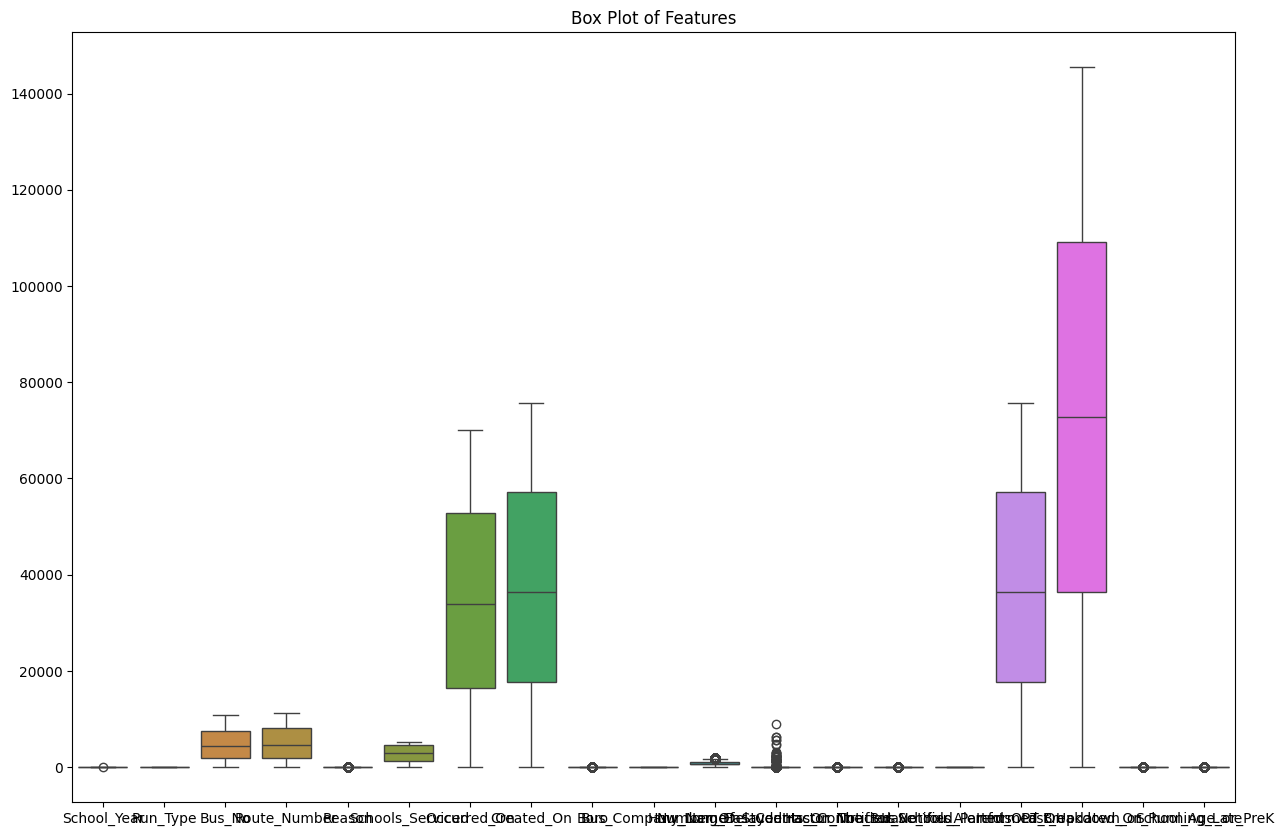

In [52]:
# checking outliers
plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.title('Box Plot of Features')
plt.show()


In [53]:
df.columns.to_list()

['School_Year',
 'Run_Type',
 'Bus_No',
 'Route_Number',
 'Reason',
 'Schools_Serviced',
 'Occurred_On',
 'Created_On',
 'Boro',
 'Bus_Company_Name',
 'How_Long_Delayed',
 'Number_Of_Students_On_The_Bus',
 'Has_Contractor_Notified_Schools',
 'Has_Contractor_Notified_Parents',
 'Have_You_Alerted_OPT',
 'Informed_On',
 'Last_Updated_On',
 'Breakdown_or_Running_Late',
 'School_Age_or_PreK']

In [68]:
# remove the outliers so i'll try to drop them using IQR
outliers_columns = ['School_Year',
 'Run_Type','Reason','Boro','Bus_Company_Name',
 'How_Long_Delayed',
 'Number_Of_Students_On_The_Bus',
 'Has_Contractor_Notified_Schools','Last_Updated_On',
 'School_Age_or_PreK']

def remove_outliers_iqr(df, columns):
    df_cleaned = df.copy()

    for column in columns:

        if column in df_cleaned.select_dtypes(include='number').columns:
            Q1 = df_cleaned[column].quantile(0.25)
            Q3 = df_cleaned[column].quantile(0.75)

            IQR = Q3 - Q1

            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            df_cleaned = df_cleaned[(df_cleaned[column] >= lower_bound) & (df_cleaned[column] <= upper_bound)]
        else:
            print(f"Column '{column}' is not numeric or does not exist in the DataFrame.")

    return df_cleaned


df = remove_outliers_iqr(df, outliers_columns)
print("\nDataFrame after removing outliers from specified columns:\n", df)




DataFrame after removing outliers from specified columns:
         School_Year  Run_Type  Bus_No  Route_Number  Reason  Schools_Serviced  \
5                 0         7    1183          5820       3              3549   
8                 0         7    6410          7025       3              3843   
12                0         7    9402          1231       3              2929   
16                0         7    9106          5961       6              4500   
20                0         7    1263          4737       3               271   
...             ...       ...     ...           ...     ...               ...   
147614            0         7    5198          2727       6              2183   
147860            0         7     572          1904       6              2158   
147861            0         7   10533          9222       3              4861   
147862            0         7    1017          3514       6              2743   
147865            0         7    1596          48

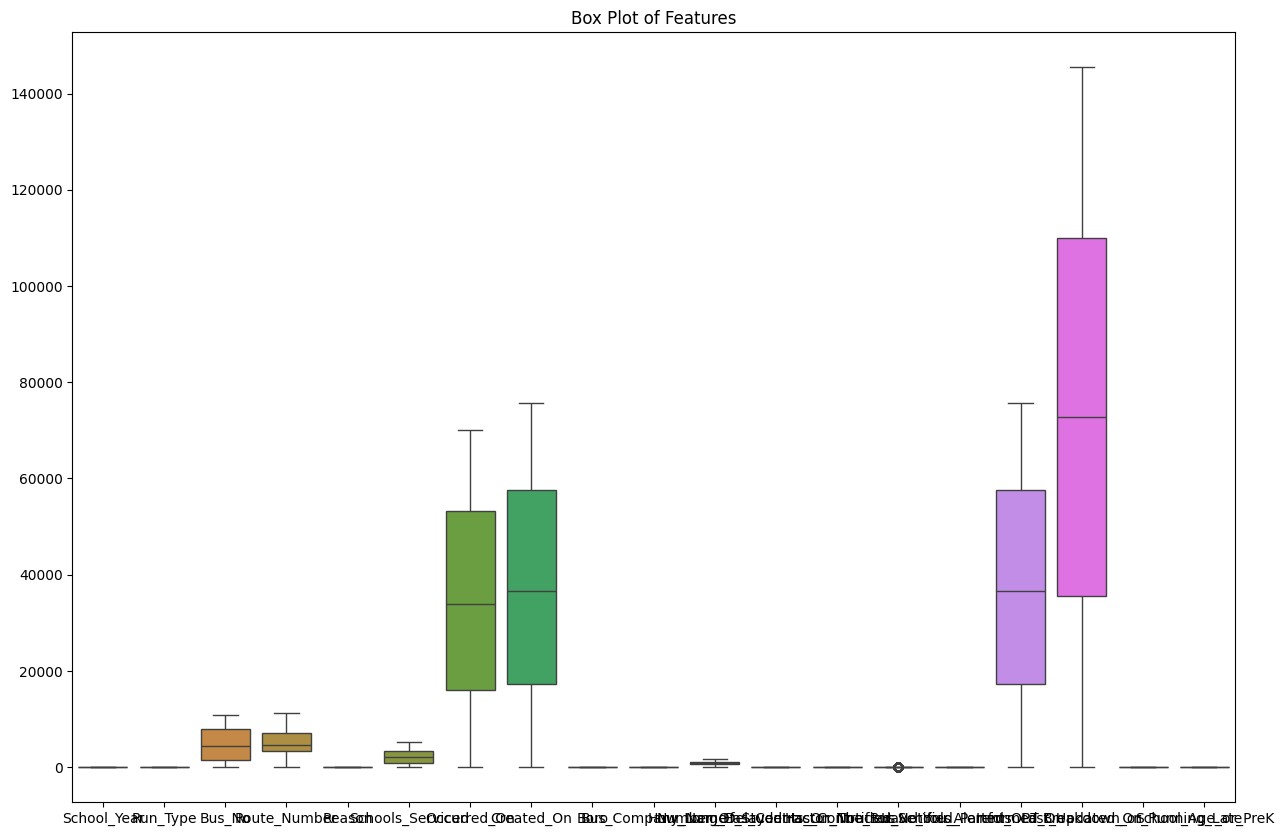

In [69]:
# checking outliers
plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.title('Box Plot of Features')
plt.show()


> outliers become much less

## Split the Dataset
Next, split the dataset into training, validation, and testing sets.

In [70]:
X = df.drop(columns=['Breakdown_or_Running_Late'])
y = df['Breakdown_or_Running_Late']

In [57]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(X)

TypeError: StandardScaler.__init__() takes 1 positional argument but 2 were given

> an error showed : StandardScaler.__init__() takes 1 positional argument but 2 were given

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [73]:
print(y_train.value_counts())

Breakdown_or_Running_Late
1    50510
Name: count, dtype: int64


In [62]:
import numpy as np

In [63]:
# oversampling using SMOTE
from imblearn.over_sampling import SMOTE
print(np.unique(y_train)) # it must be 2
smote = SMOTE(random_state=42)
X_train_sampled , y_train_sampled = smote.fit_resample(X_train,y_train)


[1]


ValueError: The target 'y' needs to have more than 1 class. Got 1 class instead

> error showed too : The target 'y' needs to have more than 1 class. Got 1 class instead

## Building the ANN Model
In this section, define the architecture of the ANN by specifying the number of layers, neurons, and activation functions.

In [64]:
# libraries to builed model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [65]:
model = Sequential()
#input layer
model.add(Dense(units=6, input_dim=X_train.shape[1], kernel_initializer='uniform',activation='relu'))
#hidden layers
model.add(Dense(units=6, activation='relu'))
model.add(Dense(units=6, activation='relu'))
#output layer
model.add(Dense(units=1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


> the out put is binary thats why i put 'sigmoid' activation function in the output layer

## Compile the Model
Compile the ANN model by defining the optimizer, loss function, and evaluation metrics.

In [66]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## Training the Model
Train the ANN model using the training data.

In [67]:
history = model.fit(X_train, y_train, batch_size=10, epochs=15, validation_split=0.2)

Epoch 1/15
5558/5558 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.9937 - loss: 2.5993 - val_accuracy: 0.9999 - val_loss: 0.0101
Epoch 2/15
5558/5558 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 1.0000 - loss: 1.8432e-06 - val_accuracy: 0.9999 - val_loss: 0.0100
Epoch 3/15
5558/5558 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 1.0000 - loss: 1.2252e-10 - val_accuracy: 0.9999 - val_loss: 0.0100
Epoch 4/15
5558/5558 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 1.0000 - loss: 2.6324e-10 - val_accuracy: 0.9999 - val_loss: 0.0100
Epoch 5/15
5558/5558 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 1.0000 - loss: 1.0049e-11 - val_accuracy: 0.9999 - val_loss: 0.0100
Epoch 6/15


KeyboardInterrupt: 

## Evaluate the Model
Evaluate the performance of the model on the test set.

In [ ]:
print(model.evaluate(X_test,y_test))

## Make Predictions
Use the trained model to make predictions on new or unseen data.

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

accuracy = accuracy_score(y_test, y_pred_classes)
print(accuracy)
print('Classification report:', classification_report(y_test,y_pred_classes))

## Model Performance Visualization
Visualize the performance metrics such as accuracy and loss over the epochs.

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

## Save the Model
Save the trained model for submission.

In [ ]:
client = MongoClient('')
db = client['TEST00']
collection = db['ANN_model']

In [ ]:
model_bytes = pickle.dumps(model)

# Store the model in the collection
model_document = {
    'model_name': 'ANN',
    'model_data': model_bytes
}
collection.insert_one(model_document)
print("Model successfully saved to MongoDB")

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, encoding). How did these techniques help prepare the data for training the model?
2. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the number of layers, type of layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for the problem at hand?
3. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
4. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics? How do they align with the objective of the task (e.g., regression vs classification)?
5. **Regularization Techniques**: If you used regularization techniques such as dropout or weight decay, explain why you implemented them and how they influenced the model's performance.
6. **Model Evaluation**: Justify your approach to evaluating the model. Why did you choose the specific performance metrics, and how do they reflect the model's success in solving the task?
7. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
8. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?

### Answer Here:

> when i used label encoder it contains all data in one class thats why the results looks like this - I tried to do one hot encoder by get_dummies but i did not work -> due the limit time i submitted it
